In [81]:
import numpy as np
import preprocessing as pp

from graph import *
from bayesian_decision_evaluation import *

from models.logistic_regression_classifier import LogisticRegression, LogisticRegressionWeighted, QuadraticExpansion

In [82]:
X, y = utils.load_data()

classes = {
    'Fake': 'blue',
    'Real': 'orange'
}

In [83]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_statistics(llr, y_true, prior, unique_labels=None):
    cost_matrix, prior_class_prob, threshold = binary_cost_matrix(prior)
    
    min_DCF, best_threshold = compute_minDCF(llr, y_true, prior, unique_labels)
    y_pred = np.where(llr >= threshold, 1, 0)
    y_pred_best = np.where(llr >= best_threshold, 1, 0)
    cm = confusion_matrix(y_true, y_pred, unique_labels)
    cm_best = confusion_matrix(y_true, y_pred_best, unique_labels)
    acc = accuracy(cm_best)
    DCF, _, _ = compute_DCF(cm, cost_matrix, prior_class_prob)
    DCF_norm, _, _ = compute_DCF_normalized(cm, cost_matrix, prior_class_prob)
    
    print(f"MinDCF: {min_DCF:.4f}, Normalized DCF: {DCF_norm:.4f}, Accuracy: {acc*100:.2f}%\n")
    
    return min_DCF, DCF, DCF_norm

### Logistic Regression (non-weighted)

In [84]:
lambda_ = np.logspace(-4, 2, 13)
pi = 0.1
X_train, y_train, X_test, y_test = utils.split_data(X, y)
n_T = np.sum(y_train == 1)
n_F = np.sum(y_train == 0)
pEmp = n_T / (n_T + n_F)

In [85]:
def plot_overall_DCF(min_DCFs, norm_DCFs, ls):
    for i, l in enumerate(ls):
        plt.plot(l, norm_DCFs[i], color = 'blue', marker = 'o')
        plt.plot(l, min_DCFs[i], color = 'orange', marker = 'o')
        
    plt.xscale('log', base=10)
    plt.xlabel('Lambda')
    plt.ylabel('DCF')
    plt.title('Overall DCF')
    plt.legend(['Normalized DCF', 'MinDCF'])
    plt.show()

#### Train on full training data

In [86]:
min_DCF_list_base = []
DCF_norm_list_base = []

for l in lambda_:
    print(f"Lambda: {l:.2e}")
    model = LogisticRegression(lambda_=l)
    folder = f"lr_base_raw_data_pi_{pi:.1e}_lambda_{l:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train, y_train, folder=folder)
    llr = model.score(X_test) - np.log(pEmp / (1 - pEmp))
    min_DCF, DCF, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_base.append(min_DCF)
    DCF_norm_list_base.append(DCF_norm)

Lambda: 1.00e-04
MinDCF: 0.3640, Normalized DCF: 0.4021, Accuracy: 86.90%

Lambda: 3.16e-04
MinDCF: 0.3650, Normalized DCF: 0.4051, Accuracy: 86.85%

Lambda: 1.00e-03
MinDCF: 0.3650, Normalized DCF: 0.4130, Accuracy: 86.85%

Lambda: 3.16e-03
MinDCF: 0.3641, Normalized DCF: 0.4297, Accuracy: 87.30%

Lambda: 1.00e-02
MinDCF: 0.3611, Normalized DCF: 0.4568, Accuracy: 87.45%

Lambda: 3.16e-02
MinDCF: 0.3621, Normalized DCF: 0.5805, Accuracy: 87.40%

Lambda: 1.00e-01
MinDCF: 0.3641, Normalized DCF: 0.8522, Accuracy: 87.30%

Lambda: 3.16e-01
MinDCF: 0.3640, Normalized DCF: 0.9950, Accuracy: 86.90%

Lambda: 1.00e+00
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 3.16e+00
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 1.00e+01
MinDCF: 0.3630, Normalized DCF: 1.0000, Accuracy: 86.95%

Lambda: 3.16e+01
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%

Lambda: 1.00e+02
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%



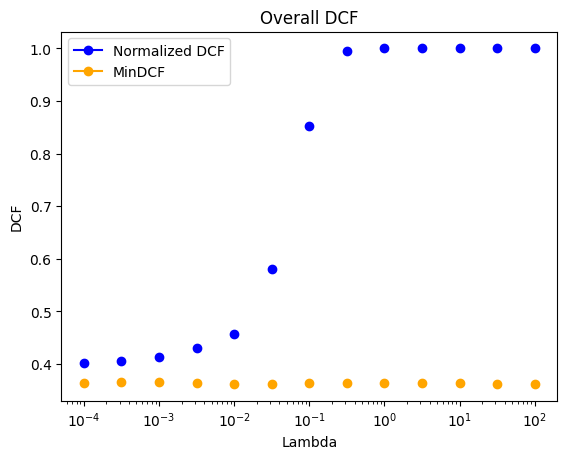

In [87]:
plot_overall_DCF(min_DCF_list_base, DCF_norm_list_base, lambda_)

#### Train on only 50 samples

In [88]:
X_train_reduced = X_train[:, ::50]
y_train_reduced = y_train[::50]

In [89]:
min_DCF_list_base_reduced = []
DCF_norm_list_base_reduced = []

for l in lambda_:
    print(f"Lambda: {l:.2e}")
    model = LogisticRegression(lambda_=l)
    model.fit(X_train_reduced, y_train_reduced)
    llr = model.score(X_test) - np.log(pEmp / (1 - pEmp))
    min_DCF, DCF, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_base_reduced.append(min_DCF)
    DCF_norm_list_base_reduced.append(DCF_norm)

Lambda: 1.00e-04
MinDCF: 0.4466, Normalized DCF: 0.9315, Accuracy: 83.55%

Lambda: 3.16e-04
MinDCF: 0.4446, Normalized DCF: 0.8708, Accuracy: 83.65%

Lambda: 1.00e-03
MinDCF: 0.4487, Normalized DCF: 0.7041, Accuracy: 83.85%

Lambda: 3.16e-03
MinDCF: 0.4497, Normalized DCF: 0.5107, Accuracy: 83.80%

Lambda: 1.00e-02
MinDCF: 0.4407, Normalized DCF: 0.4526, Accuracy: 83.85%

Lambda: 3.16e-02
MinDCF: 0.4147, Normalized DCF: 0.5065, Accuracy: 84.75%

Lambda: 1.00e-01
MinDCF: 0.3988, Normalized DCF: 0.7809, Accuracy: 85.55%

Lambda: 3.16e-01
MinDCF: 0.3888, Normalized DCF: 0.9911, Accuracy: 85.65%

Lambda: 1.00e+00
MinDCF: 0.3874, Normalized DCF: 1.0000, Accuracy: 84.50%

Lambda: 3.16e+00
MinDCF: 0.3803, Normalized DCF: 1.0000, Accuracy: 84.45%

Lambda: 1.00e+01
MinDCF: 0.3783, Normalized DCF: 1.0000, Accuracy: 84.55%

Lambda: 3.16e+01
MinDCF: 0.3793, Normalized DCF: 1.0000, Accuracy: 84.50%

Lambda: 1.00e+02
MinDCF: 0.3783, Normalized DCF: 1.0000, Accuracy: 84.55%



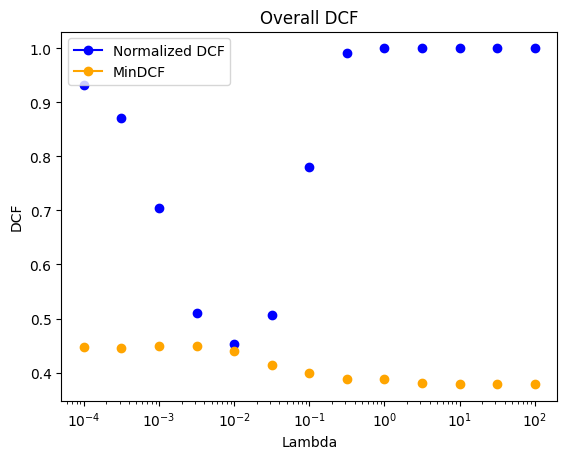

In [90]:
plot_overall_DCF(min_DCF_list_base_reduced, DCF_norm_list_base_reduced, lambda_)

### Logistic Regression (weighted)

In [91]:
min_DCF_list_weight = []
DCF_norm_list_weight = []

for l in lambda_:
    print(f"Lambda: {l:.2e}")
    model = LogisticRegressionWeighted(lambda_=l, pi=pi, n_T=n_T, n_F=n_F)
    folder = f"lr_weighted_raw_data_pi_{pi:.1e}_lambda_{l:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train, y_train, folder=folder)
    llr = model.score(X_test) - np.log(pi / (1 - pi))
    min_DCF, DCF, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_weight.append(min_DCF)
    DCF_norm_list_weight.append(DCF_norm)

Lambda: 1.00e-04
MinDCF: 0.3721, Normalized DCF: 0.4071, Accuracy: 86.90%

Lambda: 3.16e-04
MinDCF: 0.3701, Normalized DCF: 0.4010, Accuracy: 87.00%

Lambda: 1.00e-03
MinDCF: 0.3699, Normalized DCF: 0.4129, Accuracy: 86.60%

Lambda: 3.16e-03
MinDCF: 0.3670, Normalized DCF: 0.4327, Accuracy: 86.75%

Lambda: 1.00e-02
MinDCF: 0.3630, Normalized DCF: 0.4487, Accuracy: 86.95%

Lambda: 3.16e-02
MinDCF: 0.3640, Normalized DCF: 0.5964, Accuracy: 86.90%

Lambda: 1.00e-01
MinDCF: 0.3648, Normalized DCF: 0.9147, Accuracy: 86.45%

Lambda: 3.16e-01
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 1.00e+00
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 3.16e+00
MinDCF: 0.3630, Normalized DCF: 1.0000, Accuracy: 86.95%

Lambda: 1.00e+01
MinDCF: 0.3630, Normalized DCF: 1.0000, Accuracy: 86.95%

Lambda: 3.16e+01
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%

Lambda: 1.00e+02
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%



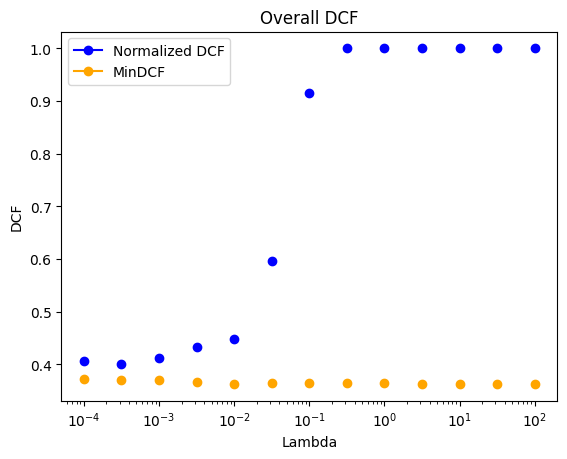

In [92]:
plot_overall_DCF(min_DCF_list_weight, DCF_norm_list_weight, lambda_)

### Quadratic Expansion

In [93]:
min_DCF_list_quad = []
DCF_norm_list_quad = []

for l in lambda_:
    print(f"Lambda: {l:.2e}")
    model = QuadraticExpansion(lambda_=l)
    X_train_quad = model.expand(X_train)
    X_test_quad = model.expand(X_test)
    folder = f"lr_quad_raw_data_pi_{pi:.1e}_lambda_{l:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train_quad, y_train, folder=folder)
    llr = model.score(X_test_quad) - np.log(pEmp / (1 - pEmp))
    min_DCF, DCF, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_quad.append(min_DCF)
    DCF_norm_list_quad.append(DCF_norm)

Lambda: 1.00e-04
MinDCF: 0.2602, Normalized DCF: 0.2768, Accuracy: 90.50%

Lambda: 3.16e-04
MinDCF: 0.2612, Normalized DCF: 0.2656, Accuracy: 90.45%

Lambda: 1.00e-03
MinDCF: 0.2587, Normalized DCF: 0.2765, Accuracy: 88.95%

Lambda: 3.16e-03
MinDCF: 0.2527, Normalized DCF: 0.2771, Accuracy: 89.25%

Lambda: 1.00e-02
MinDCF: 0.2487, Normalized DCF: 0.3464, Accuracy: 89.45%

Lambda: 3.16e-02
MinDCF: 0.2436, Normalized DCF: 0.4972, Accuracy: 89.30%

Lambda: 1.00e-01
MinDCF: 0.2466, Normalized DCF: 0.7520, Accuracy: 89.15%

Lambda: 3.16e-01
MinDCF: 0.2629, Normalized DCF: 0.9623, Accuracy: 89.55%

Lambda: 1.00e+00
MinDCF: 0.2840, Normalized DCF: 1.0000, Accuracy: 89.30%

Lambda: 3.16e+00
MinDCF: 0.3090, Normalized DCF: 1.0000, Accuracy: 88.45%

Lambda: 1.00e+01
MinDCF: 0.3243, Normalized DCF: 1.0000, Accuracy: 88.90%

Lambda: 3.16e+01
MinDCF: 0.3263, Normalized DCF: 1.0000, Accuracy: 88.80%

Lambda: 1.00e+02
MinDCF: 0.3263, Normalized DCF: 1.0000, Accuracy: 88.80%



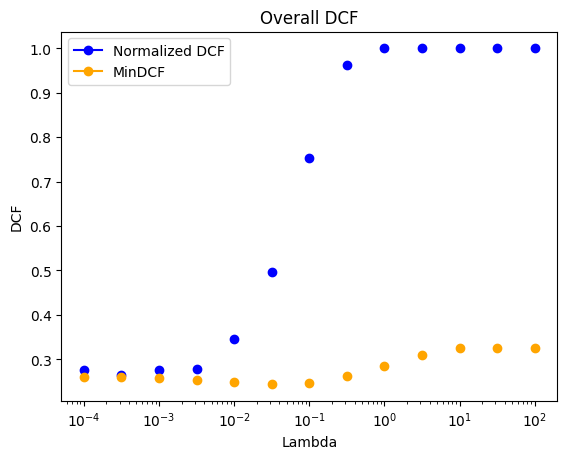

In [94]:
plot_overall_DCF(min_DCF_list_quad, DCF_norm_list_quad, lambda_)

### Regularization Effect
#### Standardization

In [95]:
X_train_std, mean, std = pp.standardize(X_train, return_params=True)
X_test_std = X_test - mean / std

In [96]:
min_DCF_list_base_std = []
DCF_norm_list_base_std = []

for l in lambda_:
    print(f"Lambda: {l:.2e}")
    model = LogisticRegression(lambda_=l)
    folder = f"lr_base_std_data_pi_{pi:.1e}_lambda_{l:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train_std, y_train, folder=folder)
    llr = model.score(X_test_std) - np.log(pEmp / (1 - pEmp))
    min_DCF, DCF, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_base_std.append(min_DCF)
    DCF_norm_list_base_std.append(DCF_norm)

Lambda: 1.00e-04
MinDCF: 0.3650, Normalized DCF: 0.4021, Accuracy: 86.85%

Lambda: 3.16e-04
MinDCF: 0.3650, Normalized DCF: 0.4051, Accuracy: 86.85%

Lambda: 1.00e-03
MinDCF: 0.3650, Normalized DCF: 0.4120, Accuracy: 86.85%

Lambda: 3.16e-03
MinDCF: 0.3641, Normalized DCF: 0.4297, Accuracy: 87.30%

Lambda: 1.00e-02
MinDCF: 0.3611, Normalized DCF: 0.4568, Accuracy: 87.45%

Lambda: 3.16e-02
MinDCF: 0.3621, Normalized DCF: 0.5785, Accuracy: 87.40%

Lambda: 1.00e-01
MinDCF: 0.3641, Normalized DCF: 0.8512, Accuracy: 87.30%

Lambda: 3.16e-01
MinDCF: 0.3640, Normalized DCF: 0.9950, Accuracy: 86.90%

Lambda: 1.00e+00
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 3.16e+00
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 1.00e+01
MinDCF: 0.3630, Normalized DCF: 1.0000, Accuracy: 86.95%

Lambda: 3.16e+01
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%

Lambda: 1.00e+02
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%



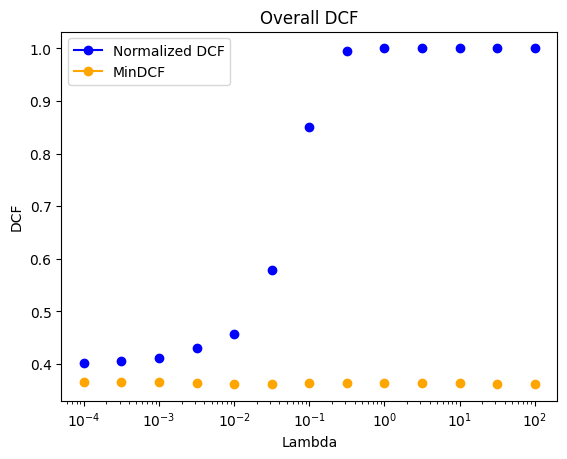

In [97]:
plot_overall_DCF(min_DCF_list_base_std, DCF_norm_list_base_std, lambda_)

In [98]:
min_DCF_list_weight_std = []
DCF_norm_list_weight_std = []

for l in lambda_:
    print(f"Lambda: {l:.2e}")
    model = LogisticRegressionWeighted(lambda_=l, pi=pi, n_T=n_T, n_F=n_F)
    folder = f"lr_weighted_std_data_pi_{pi:.1e}_lambda_{l:.1e}".replace('.', '_').replace('e-0', 'e-')
    model.fit(X_train_std, y_train, folder=folder)
    llr = model.score(X_test_std) - np.log(pi / (1 - pi))
    min_DCF, DCF, DCF_norm = compute_statistics(llr, y_test, pi)
    min_DCF_list_weight_std.append(min_DCF)
    DCF_norm_list_weight_std.append(DCF_norm)

Lambda: 1.00e-04
MinDCF: 0.3721, Normalized DCF: 0.4071, Accuracy: 86.90%

Lambda: 3.16e-04
MinDCF: 0.3711, Normalized DCF: 0.4090, Accuracy: 86.95%

Lambda: 1.00e-03
MinDCF: 0.3699, Normalized DCF: 0.4119, Accuracy: 86.60%

Lambda: 3.16e-03
MinDCF: 0.3670, Normalized DCF: 0.4327, Accuracy: 86.75%

Lambda: 1.00e-02
MinDCF: 0.3630, Normalized DCF: 0.4487, Accuracy: 86.95%

Lambda: 3.16e-02
MinDCF: 0.3640, Normalized DCF: 0.5964, Accuracy: 86.90%

Lambda: 1.00e-01
MinDCF: 0.3648, Normalized DCF: 0.9147, Accuracy: 86.45%

Lambda: 3.16e-01
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 1.00e+00
MinDCF: 0.3640, Normalized DCF: 1.0000, Accuracy: 86.90%

Lambda: 3.16e+00
MinDCF: 0.3630, Normalized DCF: 1.0000, Accuracy: 86.95%

Lambda: 1.00e+01
MinDCF: 0.3630, Normalized DCF: 1.0000, Accuracy: 86.95%

Lambda: 3.16e+01
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%

Lambda: 1.00e+02
MinDCF: 0.3620, Normalized DCF: 1.0000, Accuracy: 87.00%



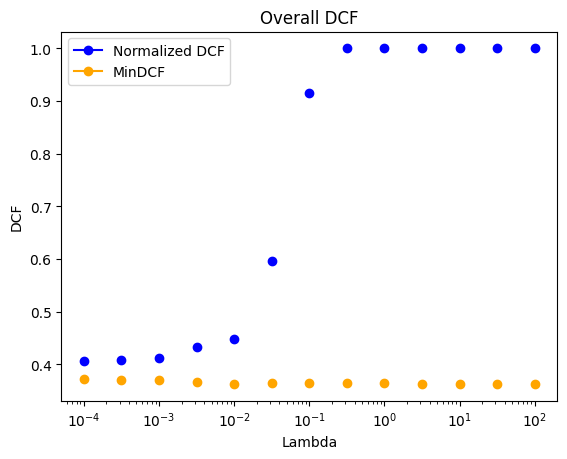

In [99]:
plot_overall_DCF(min_DCF_list_weight_std, DCF_norm_list_weight_std, lambda_)